In [1]:
import car_schema 
from pyspark.sql import SparkSession 
import seaborn as sns

In [2]:
spark = SparkSession.builder.master("local[1]") \
                    .appName('SparkByExamples.com') \
                    .getOrCreate()

24/01/02 13:19:02 WARN Utils: Your hostname, chema-BOHK-WAX9X resolves to a loopback address: 127.0.1.1; using 192.168.1.189 instead (on interface wlp2s0)
24/01/02 13:19:02 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/01/02 13:19:04 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/01/02 13:19:05 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [3]:
file='car_tables/Price_table.csv'
df=spark.read.csv(file,header=False, schema=car_schema.schema_price)

In [4]:
pd_df=df.toPandas()

df.printSchema()

root
 |-- Maker: string (nullable = true)
 |-- Genmodel: string (nullable = true)
 |-- Genmodel_ID: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Price: integer (nullable = true)



[Row(skewness(Price)=3.998993504083825)]


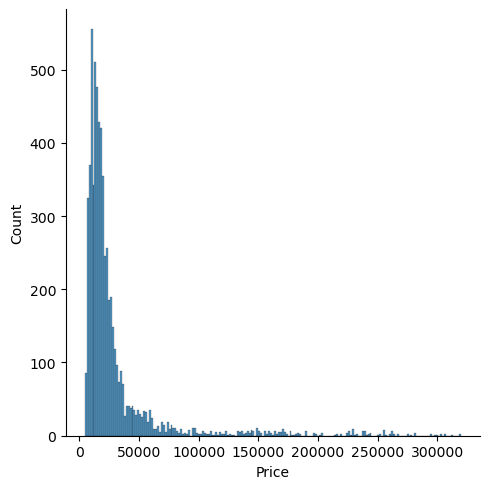

In [6]:
print(df.agg({'Price':'skewness'}).collect())
sns.displot(pd_df, x='Price')

There are outliers derived from very expensive cars, and the distribution is heavily skewed

<AxesSubplot:>

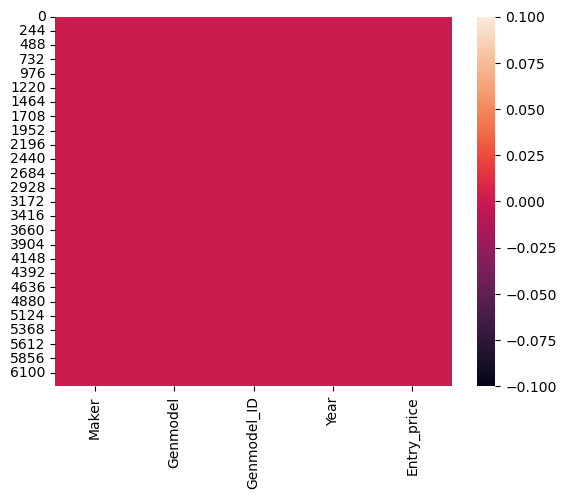

In [ ]:
sns.heatmap(pd_df.isnull())

Appears that the data is cleaned of nulls